In [ ]:
# Inatalación, es necesario correr esta celda, de lo contrario el código no funcionara.:
! pip install pyomo
! apt-get update
! apt-get install -y glpk-utils




Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,372 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,947 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

Aquí tiene que escribir la función y restricciones respectivas:



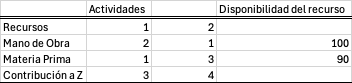

### Función objetivo

$$
\text{Max } Z = 3x_1 + 4x_2
$$
Restricciones de actividades:
$$
2x_1 + x_2 \leq 100
$$
$$
x_1 + 3x_2 \leq 90
$$
Restricciones de no negatividad:

$$
x_1 \geq 0
$$
$$
x_2 \geq 0
$$

In [ ]:
# Importamos las bibliotecas necesarias
from pyomo.environ import *

# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.x_1 = Var(within=NonNegativeReals)  # x_1 >= 0
model.x_2 = Var(within=NonNegativeReals)  # x_2 >= 0


# Definimos la función objetivo
model.obj = Objective(expr=3*model.x_1 + 4*model.x_2, sense=maximize)

# Definimos las restricciones
# Complete con la restricción 1:
model.con1 = Constraint(expr= 2*model.x_1 + model.x_2 <= 100)
# Complete con la restricción 2:
model.con2 = Constraint(expr= model.x_1 + 3*model.x_2 <= 90)

# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')


# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_1: {model.x_1()}")
print(f"Valor óptimo de x_2: {model.x_2()}")
# print(f"Valor óptimo body de x_1: {model.x_1()}")
# print(f"Valor óptimo body de x_2: {model.x_2()}")
print(f"Valor óptimo de Z: {model.obj()}")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 190.0
  Upper bound: 190.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of nonzeros: 4
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004449605941772461
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

In [ ]:

print("Restricción 1, evaluavión en puntos optimos: ")
print(2*42+16)
print("Restricción 2, evaluación en puntos optimos:")
print(42+16*3)


Restricción 1, evaluavión en puntos optimos: 
100
Restricción 2, evaluación en puntos optimos:
90


In [ ]:
model.display()

Model unknown

  Variables:
    x_1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  42.0 :  None : False : False : NonNegativeReals
    x_2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  16.0 :  None : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 190.0

  Constraints:
    con1 : Size=1
        Key  : Lower : Body  : Upper
        None :  None : 100.0 : 100.0
    con2 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 90.0 :  90.0


### Función objetivo

$$
\text{Max } Z = 3x_1 + 4x_2
$$
Restricciones de actividades:
$$
2x_1 + x_2 \leq 100
$$
$$
x_1 + 3x_2 \leq 90
$$
Restricciones de no negatividad:

$$
x_1 \geq 0
$$
$$
x_2 \geq 0
$$

## Problema dual

Función objetivo

 $$ \text{Min } W = 100y_1 + 90y_2$$
S.a:
\begin{align}
    2y_1 + y_2 \geq 3\\
    y_1 + 3y_2 \geq 4\\
\end{align}
Restricción de no negatividad:
$y_1, y_2 \geq 0$

Complete el siguiente código.
Para completarlo, lea los comentarios del código, los cuales le dirán lo que tiene que completar.

In [ ]:
# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.y_1 = Var(within=NonNegativeReals)  # y_1 >= 0
model.y_2 = Var(within=NonNegativeReals)  # y_2 >= 0


# Definimos la función objetivo
model.obj = Objective(expr=100*model.y_1 + 90*model.y_2, sense=minimize)


# Definimos las restricciones
# Complete con la restricción 1:
model.con1 = Constraint(expr= 2*model.y_1 + model.y_2 >= 3)
# Complete con la restricción 2:
model.con2 = Constraint(expr= model.y_1 + 3*model.y_2 >= 4)


# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')


# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de y_1: {model.y_1()}")
print(f"Valor óptimo de y_2: {model.y_2()}")
print(f"Valor óptimo de W: {model.obj()}")




# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 190.0
  Upper bound: 190.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of nonzeros: 4
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.002391338348388672
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

# Problema de Wyndor Glass

Problema primal en forma algebraica
                
Maximizar $Z = 3x_1 + 5x_2,$ sujeta a
                \begin{align*}
                    x_1 &\le 4 \\
                    2x_2 &\le 12 \\
                    3x_1 + 2x_2 &\le 18 \\
                    x_1 &\ge 0, \quad x_2 \ge 0.
                \end{align*}


In [ ]:
# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.x_1 = Var(within=NonNegativeReals)  # x_1 >= 0
model.x_2 = Var(within=NonNegativeReals)  # x_2 >= 0


# Definimos la función objetivo
model.obj = Objective(expr=3*model.x_1 + 5*model.x_2, sense=maximize)


# Definimos las restricciones
# Complete con la restricción 1:
model.con1 = Constraint(expr= model.x_1 <= 4)
# Complete con la restricción 2:
model.con2 = Constraint(expr= model.x_2 <= 6)
# Complete con la restricción 3:
model.con3 = Constraint(expr= 3*model.x_1 + 2*model.x_2 <= 18)


# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')


# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_1: {model.x_1()}")
print(f"Valor óptimo de x_2: {model.x_2()}")
print(f"Valor óptimo de W: {model.obj()}")


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 36.0
  Upper bound: 36.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 4
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0030384063720703125
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

# Problema dual de Wyndor Glass

PLANTEA AQUÍ EL PROBLEMA DUAL Y OPTIMIZA, AL FINAL DAME LA INTERPRETACIÓN DE TUS RESULTADOS, Y HAS UN ANÁLISIS DE SENSIBILIDAD CON TUS RESULTADOS.
LOS RESULTADOS ESPERADOS SON LOS SIGUIENTS:

- Valor óptimo de y_1: 0.0

- Valor óptimo de y_2: 1.5
- Valor óptimo de y_3: 1.0

- Valor óptimo de W: 27.0

In [ ]:
# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.y_1 = Var(within=NonNegativeReals)  # y_1 >= 0
model.y_2 = Var(within=NonNegativeReals)  # y_2 >= 0
model.y_3 = Var(within=NonNegativeReals)  # y_3 >= 0


# Definimos la función objetivo
model.obj = Objective(expr= 4*model.y_1 + 12*model.y_2 + 18*model.y_3, sense= minimize)


# Definimos las restricciones
# Complete con la restricción 1:
model.con1 = Constraint(expr= model.y_1 + 3*model.y_3 >= 3)
# Complete con la restricción 2:
model.con2 = Constraint(expr= 2*model.y_2 + 2*model.y_3 >= 5)



# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')


# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de y_1: {model.y_1()}")
print(f"Valor óptimo de y_2: {model.y_2()}")
print(f"Valor óptimo de y_3: {model.y_3()}")
print(f"Valor óptimo de W: {model.obj()}")


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 36.0
  Upper bound: 36.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 3
  Number of nonzeros: 4
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0024704933166503906
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

si agregamos una unidad de y2 la funcion objetivo crecera en 1.5, la y3 si aumentamos en 1 aumentara la funcion objetivo en 1